# Assignment 3: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_kmeans.ipynb**.


#Sources
ML 4774 End-to-End Lecture and Collab Notebook

Generating list of unique random numbers:
https://stackoverflow.com/questions/8505651/non-repetitive-random-number-in-numpy

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd drive/My\ Drive/ML

/content/drive/My Drive/ML


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [0]:
# You might want to use the following package
import pandas as pd
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.

In [0]:
housing = pd.read_csv('housing.csv')

In [0]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [0]:
housing.columns[0:-1]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [0]:
from sklearn.compose import ColumnTransformer
num_pipe = Pipeline(steps=[
    ('imputer', Imputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[
    ('imputer', Imputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

pipe = ColumnTransformer(
    transformers=[
        ('num', num_pipe, ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value']),
        ('cat', cat_pipe, ['ocean_proximity'])])


In [0]:
import numpy as np

In [0]:
housing_transform = pipe.fit_transform(housing)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [21]:
from numpy.random import default_rng

rng = default_rng()


[2 0 1]


In [0]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

def Minkovski(x, y, p):
  d = 0
  for i in range(len(x)):
    d += np.abs(x[i] - y[i])**p
  return d**(1/p)

def sup(x, y):
  d = 0
  for i in range(len(x)):
    d = max(d, np.abs(x[i]-y[i]))
  return d


def kmeans(data, k=2, p=1):
  centroids = []
  idx = rng.choice(len(data), size=k, replace=False)
  for i in range(k):
    centroids.append(data[idx[k]])
  centroids_new = ['' for i in range(k)]
  while True:
    clusters = [[] for i in range(k)]
    for i in data:
      min_dist = 999999999
      lab = -1
      for c in range(len(centroids)):
        if p == 'inf':
          d = sup(i, centroids[c])
        else:
          d = Minkovski(i, centroids[c], p)
        if d < min_dist:
          min_dist = d
          lab = c
      clusters[lab].append(i)
    for j in range(k):
      centroids_new[j] = np.mean(clusters[j], axis=0)
    if np.array_equal(centroids, centroids_new):
      pass
    else:
      centroids = centroids_new


    stdevs=[[0 for q in range(len(data[0]))] for j in range(len(centroids))] #calculated the standard devations within clusters
    SSE = 0
    for i in range(len(centroids)):
      J = 0
      for m in range(len(centroids[i])):
        for f in range(len(clusters[i])):
          J += (clusters[i][f][m]-centroids[i][m])**2 # Get Standard Deviations
          SSE += (clusters[i][f][m]-centroids[i][m])**2 # Get SSE
        stdevs[i][m] = (J/(len(clusters[i])))**.5
        J=0
    col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'Ocean_Dummy_1', 'Ocean_Dummy_2', 'Ocean_Dummy_3', 'Ocean_Dummy_4', 'Ocean_Dummy_5']
    centroids = pd.DataFrame(centroids, columns=col)
    stdevs = pd.DataFrame(stdevs, columns=col)

    for i in range(len(clusters)):
      for j in range(len(clusters[i])):
        clusters[i][j] = np.append(clusters[i][j], i) # label the clusters with their centroid
    
    
    return {'centroids': centroids, 'stdevs': stdevs, 'clusters': clusters, 'SSE': SSE}
  


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

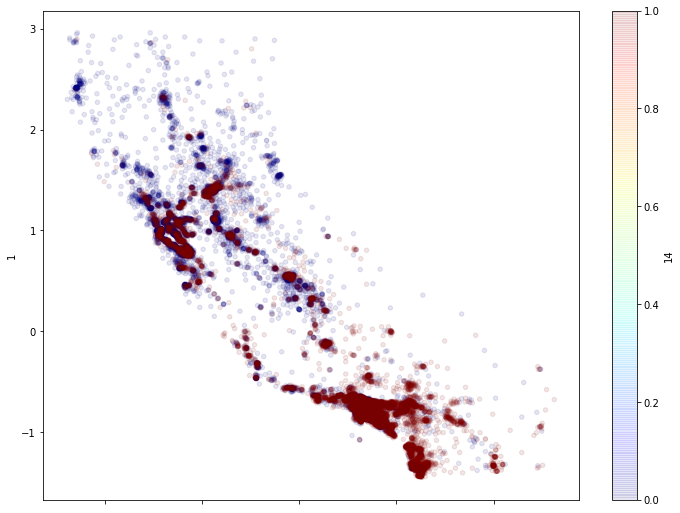

In [0]:
km = kmeans(housing_transform, k=2, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

166159.7978122252

In [0]:
km['centroids'] #cluster means

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,-0.443559,0.437726,0.360219,-0.450789,-0.489158,-0.496304,-0.497163,-0.022244,-0.013747,0.361834,0.353625,0.000277,0.178380,0.105885
1,0.490821,-0.484367,-0.398602,0.498822,0.541279,0.549186,0.550137,0.024614,0.015212,0.532047,0.277301,0.000204,0.036334,0.154113


In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.942759,0.974224,0.974636,0.373543,0.375288,0.353059,0.384600,1.053751,1.067478,0.480531,0.478094,0.016632,0.382833,0.307690
1,0.815132,0.780819,0.867729,1.215921,1.180233,1.180869,1.169066,0.936319,0.919340,0.498972,0.447667,0.014286,0.187120,0.361057


# Cluster The Data
In the above map, we see the two clusters that my k-means algorithm cam up with. The standard deviation for the **entire sample** for each feature (besides the dummy variable) is one, because the variables are standardized. Therefore, standard deviations below 1 mean the data for that feature in an individual cluster is less spread out than for the entire sample. We see that both the latitude and longitude standard deviations are lower than 1 for both the clusters. This should come as no surprise, as the map shows that the clusters are divided at least somewhat by location. Cluster 1 (in red) covers much of the coastal and southern areas of California, while cluster 0 (in blue) covers roughly the northern areas of California.

We see that these two groups have about the same median income, though cluster 1 is slighly higher than 0. Where these clusters differ is that the red cluster has higher 'house_holds', 'rooms', and 'population' values, and lower age values. This means that the red cluster is more densely populated than the blue, and its houses are younger and contain more rooms. This seems logical, as the red cluster contains large chunks of some of California's biggest cities, such as LA, San Francisco, and San Diego. So, we would expect more people in the red cluster, as well as newer homes.

Looking at the standard deviations besides latitude and longitude, we see that the northern cluster is more uniform, while the southern / coastal cluster has more variety, with many standard deviations higher than 1. This could be because the red cluster contains many of the outliers in terms of high income, home value, and home size, due to the presence of the tech and entertainment industries in San Franciso and Los Angeles. 

The SSE is about 170 thousand, which is slightly better when I tried clustering with Manhattan distance and Sup.


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

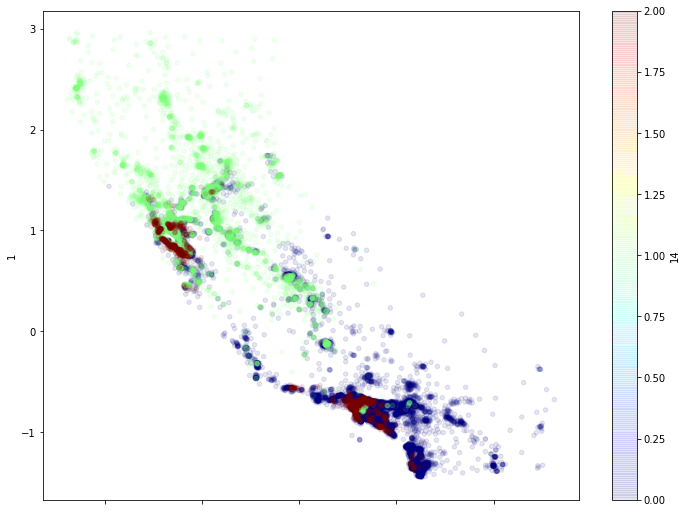

In [0]:
km = kmeans(housing_transform, k=3, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

153519.65926298234

In [0]:
km['centroids'] #cluster means

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.595055,-0.606792,-0.239984,0.142612,0.168323,0.193272,0.167877,-0.031570,-0.023873,0.583423,0.245041,0.000412,0.011853,0.159272
1,-1.002088,1.077003,0.290365,-0.237142,-0.214678,-0.247731,-0.218959,-0.403734,-0.422780,0.153979,0.505128,0.000000,0.267947,0.072945
2,-0.186137,-0.053686,0.577403,-0.057948,-0.356339,-0.403711,-0.333982,2.027163,2.051620,0.626276,0.049107,0.000000,0.185587,0.139031


In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.680040,0.618338,0.936045,1.177859,1.160437,1.152004,1.150715,0.786221,0.814281,0.492992,0.430111,0.020283,0.108224,0.365930
1,0.567341,0.584051,0.989555,0.590336,0.658227,0.660159,0.685142,0.622309,0.774981,0.360929,0.499974,0.000000,0.442890,0.260047
2,0.973231,0.847195,0.948278,0.682665,0.516406,0.482830,0.538066,1.351733,0.609411,0.483792,0.216092,0.000000,0.388773,0.345978


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

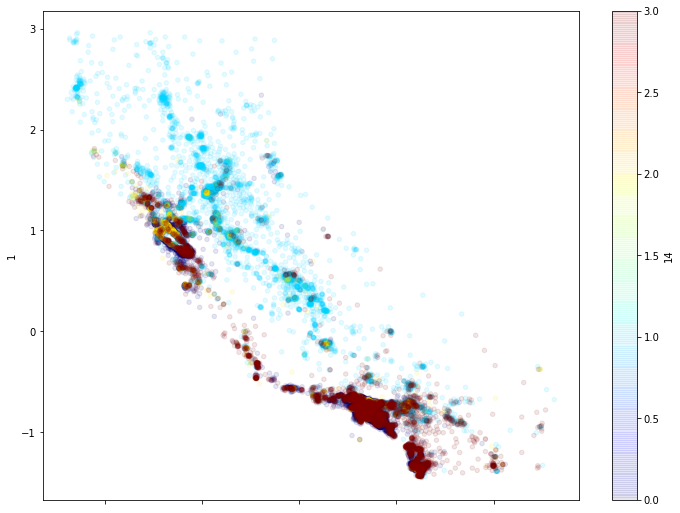

In [0]:
km = kmeans(housing_transform, k=4, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

152963.70373927816

In [0]:
km['centroids'] #cluster means

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.029418,-0.197435,0.232270,-0.278535,-0.467977,-0.468484,-0.452719,1.046678,1.011218,0.600113,0.105570,0.000565,0.134362,0.159390
1,-0.427784,0.721260,-0.328287,0.340842,0.389069,0.397862,0.372636,-0.486684,-0.742234,0.091036,0.759150,0.000000,0.095533,0.054280
2,-0.036089,-0.134512,1.190651,-0.460860,-0.339415,-0.290353,-0.336149,-0.607419,-0.184540,0.542151,0.089535,0.000581,0.231105,0.136628
3,0.501319,-0.577196,-0.590902,0.159572,0.210685,0.169718,0.213193,-0.061490,0.008667,0.642700,0.144722,0.000000,0.030342,0.182236


In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.971997,0.865021,0.899358,0.528576,0.406767,0.391711,0.423317,1.107842,0.988423,0.489875,0.307287,0.023753,0.341041,0.366040
1,0.926929,0.943112,0.896262,1.418889,1.410050,1.459649,1.413622,0.587186,0.502269,0.287660,0.427599,0.000000,0.293950,0.226570
2,1.014946,0.885721,0.503440,0.374221,0.482238,0.484227,0.491791,0.448601,0.740935,0.498220,0.285514,0.024105,0.421539,0.343454
3,0.855504,0.716841,0.682528,0.820581,0.786408,0.697611,0.784900,0.686637,0.721322,0.479204,0.351821,0.000000,0.171527,0.386039


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

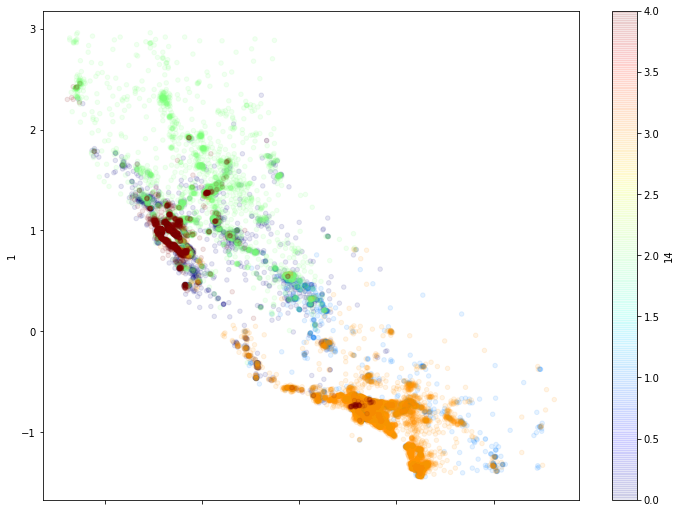

In [0]:
km = kmeans(housing_transform, k=5, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

139975.41188897012

In [0]:
km['centroids'] #cluster means

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,-0.934413,0.786998,-0.247624,-0.538551,-0.583361,-0.568412,-0.593124,-0.050335,-0.073110,0.450094,0.337100,0.000000,0.113465,0.099341
1,0.721319,-0.674211,0.741657,-0.521270,-0.424008,-0.228255,-0.422325,-0.669899,-0.653197,0.571201,0.313231,0.000266,0.000266,0.115037
2,-0.975339,1.271966,-0.547157,0.234461,0.210839,0.159399,0.204259,-0.281894,-0.586651,0.096860,0.733816,0.000000,0.109662,0.059662
3,0.768651,-0.806269,-0.336906,0.334068,0.331009,0.286004,0.331275,0.314691,0.379669,0.656026,0.176963,0.000485,0.001942,0.164583
4,-1.274912,0.945242,1.169554,-0.260055,-0.322390,-0.400272,-0.305767,0.506831,0.806810,0.094395,0.067425,0.000000,0.664981,0.173198


In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.532372,0.476151,0.770417,0.381425,0.377375,0.402106,0.399379,0.885923,0.846127,0.497503,0.472719,0.000000,0.317161,0.299119
1,0.427160,0.424331,0.626197,0.314399,0.404240,0.573907,0.413894,0.480981,0.465602,0.494904,0.463807,0.016297,0.016297,0.319067
2,0.494265,0.525903,0.803996,0.924097,0.913993,0.923829,0.952501,0.705237,0.610997,0.295767,0.441961,0.000000,0.312468,0.236859
3,0.438422,0.327120,0.881562,1.251262,1.251249,1.257017,1.232064,0.990492,0.982563,0.475032,0.381638,0.022029,0.044025,0.370804
4,0.343520,0.326716,0.712037,0.493423,0.516010,0.441927,0.533889,1.378764,1.129837,0.292378,0.250757,0.000000,0.471997,0.378419


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

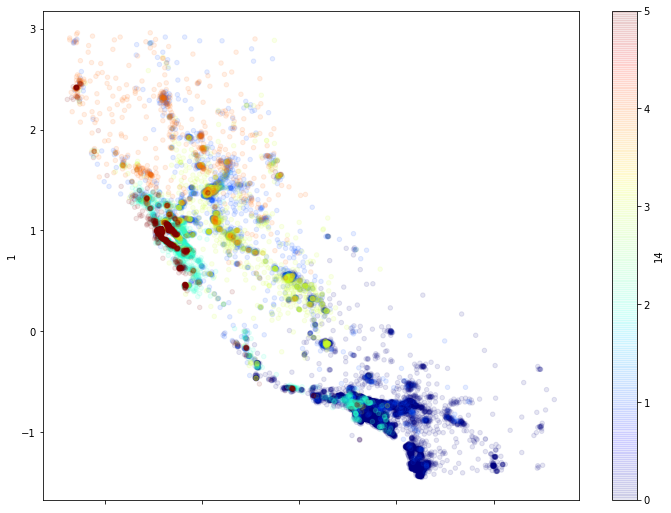

In [0]:
km = kmeans(housing_transform, k=6, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

129392.67285986348

In [0]:
km['centroids']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.803059,-0.811964,-0.009426,-0.088841,-0.050255,-0.009176,-0.048562,-0.040982,0.012379,0.635428,0.206193,0.000364,0.000000,0.158015
1,-0.717662,0.936901,-0.750852,0.965340,1.009726,0.916930,1.005535,-0.275790,-0.527731,0.144773,0.686039,0.000000,0.124484,0.044704
2,-0.943063,0.623266,-0.068791,0.183528,-0.085587,-0.053362,-0.041088,1.419418,1.176320,0.603935,0.051326,0.000000,0.257057,0.087682
3,-0.732447,0.937309,0.534103,-0.630266,-0.642024,-0.622207,-0.664150,-0.607496,-0.846990,0.053106,0.739687,0.000000,0.195353,0.011854
4,-1.220973,1.718320,-0.808527,-0.552819,-0.538212,-0.654374,-0.619994,-0.780821,-0.899378,0.103666,0.757269,0.000000,0.056890,0.082174
5,-1.331059,0.923172,1.295199,-0.326494,-0.267258,-0.403618,-0.266652,-0.110817,0.757063,0.087186,0.008587,0.000661,0.574637,0.328930


In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.363346,0.290578,0.934462,0.711291,0.751516,0.739694,0.739014,0.840945,0.887084,0.481310,0.404571,0.019083,0.000000,0.364755
1,0.694247,0.732054,0.764790,1.742559,1.702408,1.761106,1.702001,0.611908,0.570083,0.351872,0.464101,0.000000,0.330133,0.206654
2,0.690376,0.647181,0.885295,0.851994,0.702865,0.722677,0.729163,1.336974,0.973547,0.489078,0.220662,0.000000,0.437011,0.282832
3,0.538825,0.501408,0.778421,0.263126,0.289002,0.319331,0.296109,0.549350,0.425220,0.224244,0.438805,0.000000,0.396472,0.108229
4,0.571418,0.554223,0.564565,0.272856,0.305786,0.280611,0.303374,0.450192,0.355180,0.304827,0.428734,0.000000,0.231632,0.274630
5,0.317649,0.384299,0.669537,0.395145,0.507144,0.414748,0.518214,0.619462,0.923153,0.282108,0.092265,0.025692,0.494398,0.469824


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

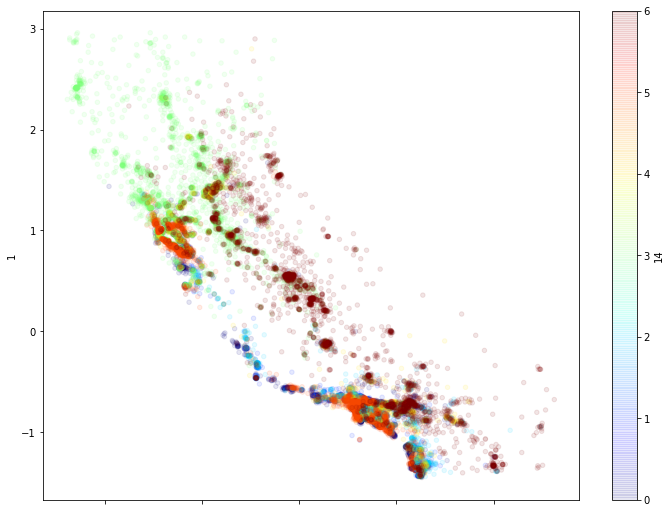

In [0]:
km = kmeans(housing_transform, k=7, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

98782.18241648076

In [0]:
km['centroids']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.275542,-0.475842,-0.358157,0.536759,0.555817,0.323423,0.547332,0.195665,0.476677,0.210951,0.133141,0.000000,0.069164,0.586744
1,0.643598,-0.741630,0.558866,-0.475350,-0.510816,-0.415708,-0.493147,0.036732,-0.028766,0.836029,0.068509,0.000449,0.000898,0.094115
2,0.612762,-0.682659,-0.376706,0.097271,0.287429,0.555692,0.326940,-0.366124,-0.322580,0.777383,0.132149,0.000000,0.001939,0.088530
3,-1.130362,1.190816,0.395490,-0.267724,-0.273495,-0.297620,-0.271099,-0.351875,-0.438413,0.118164,0.502868,0.000000,0.298088,0.080880
4,0.172515,-0.151288,-1.039215,3.103493,3.191656,2.897689,3.177896,0.199231,0.153942,0.477366,0.351852,0.000000,0.090535,0.080247
5,-0.131555,-0.108558,0.248300,0.096181,-0.108165,-0.236779,-0.089463,1.503197,2.037505,0.621238,0.039123,0.001290,0.202494,0.135856
6,0.286304,0.145491,-0.825655,-0.337875,-0.353393,-0.402660,-0.434270,-0.430968,-0.811502,0.040636,0.898587,0.000000,0.014841,0.045936


In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.969305,0.820670,0.875897,0.673972,0.684386,0.647544,0.664342,0.738888,0.650353,0.407984,0.339727,0.00000,0.253733,0.492418
1,0.485341,0.390910,0.741667,0.322848,0.299507,0.330629,0.310403,0.766543,0.593164,0.370249,0.252617,0.02119,0.029961,0.291989
2,0.666075,0.535006,0.766289,0.503644,0.513443,0.680112,0.522798,0.607336,0.454140,0.416003,0.338652,0.00000,0.043987,0.284064
3,0.450417,0.487493,0.943351,0.498915,0.524844,0.532959,0.542378,0.660566,0.691700,0.322803,0.499992,0.00000,0.457418,0.272650
4,0.989134,0.927676,0.706117,2.018046,1.734888,2.069402,1.713699,0.870830,0.877400,0.499487,0.477548,0.00000,0.286947,0.271675
5,0.988005,0.855054,1.033319,0.662184,0.610059,0.523295,0.624868,1.422573,0.527651,0.485079,0.193887,0.03589,0.401858,0.342635
6,0.878473,0.904548,0.710224,0.499473,0.516008,0.456067,0.464986,0.665650,0.434860,0.197446,0.301875,0.00000,0.120916,0.209347


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

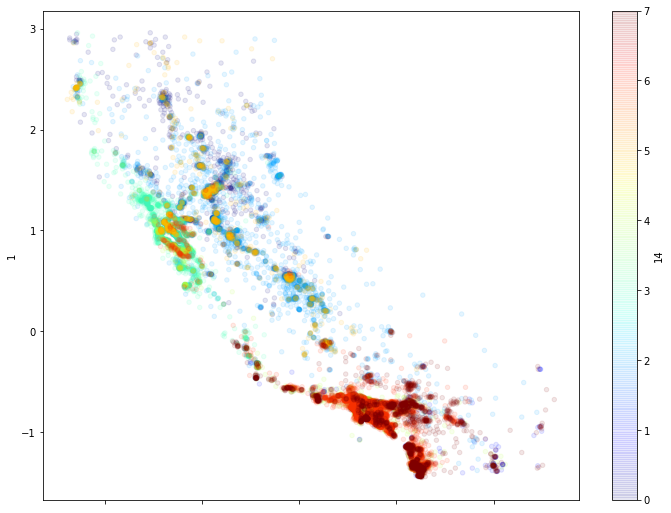

In [0]:
km = kmeans(housing_transform, k=8, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

115323.561073665

In [0]:
km['centroids']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,-0.915752,1.381120,-1.258996,0.087029,0.009504,-0.017077,-0.022535,-0.244615,-0.648516,0.013686,0.913321,0.000000,0.040146,0.032847
1,0.778852,-0.810080,0.618229,-0.398590,-0.230344,-0.007876,-0.217635,-0.683100,-0.452780,0.748549,0.152160,0.000645,0.000000,0.098646
2,-0.582197,0.861886,0.049694,-0.608679,-0.658507,-0.661326,-0.696603,-0.406502,-0.736191,0.029797,0.774722,0.000000,0.157826,0.037656
3,-1.299987,0.962892,0.049639,0.265094,0.250065,0.165182,0.287313,0.280446,0.592079,0.402566,0.063531,0.000000,0.371411,0.162492
4,0.497214,-0.621523,0.580774,-0.541979,-0.639208,-0.610585,-0.626967,0.589665,0.575528,0.750302,0.084843,0.000906,0.049517,0.114432
5,-0.858089,1.087520,0.538959,0.031903,0.144821,0.116795,0.147281,-0.827194,-0.921212,0.014354,0.717703,0.000000,0.228298,0.039645
6,0.680204,-0.734395,-0.560996,1.128914,1.032396,0.936767,1.040445,0.775886,0.781088,0.727483,0.146829,0.000000,0.014480,0.111208
7,0.997730,-0.944985,-0.862709,-0.009410,0.125556,0.073576,0.082159,-0.377288,-0.440271,0.197243,0.353128,0.000000,0.000000,0.449629


In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.491761,0.582878,0.385806,0.545106,0.496842,0.596264,0.512137,0.636808,0.451941,0.116184,0.281364,0.000000,0.196302,0.178235
1,0.309335,0.190905,0.622980,0.317619,0.402037,0.550930,0.415927,0.410368,0.487729,0.433847,0.359176,0.025384,0.000000,0.298186
2,0.724230,0.664225,0.895776,0.307210,0.292944,0.309009,0.289141,0.664277,0.525071,0.170027,0.417765,0.000000,0.364578,0.190362
3,0.244674,0.336073,1.027169,0.806274,0.878208,0.848293,0.909133,0.766346,0.879677,0.490415,0.243915,0.000000,0.483182,0.368902
4,0.679178,0.553078,0.817415,0.286967,0.266055,0.271663,0.278577,1.011499,0.959192,0.432838,0.278648,0.030083,0.216945,0.318336
5,0.611957,0.608762,0.882989,0.575085,0.617117,0.705825,0.627833,0.383907,0.370742,0.118945,0.450117,0.000000,0.419736,0.195123
6,0.536716,0.445061,0.816856,1.627925,1.602988,1.636402,1.566809,1.248645,1.048618,0.445254,0.353935,0.000000,0.119459,0.314389
7,0.499162,0.334885,0.626165,0.482682,0.577433,0.618252,0.544933,0.582477,0.538482,0.397917,0.477942,0.000000,0.000000,0.497456


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

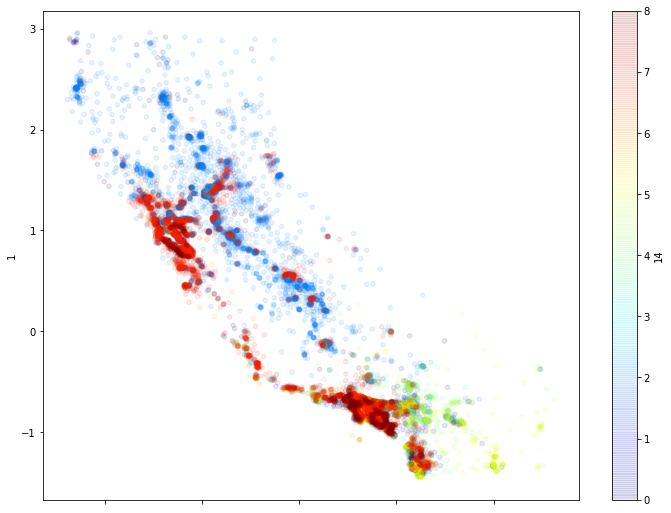

In [0]:
km = kmeans(housing_transform, k=9, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

99771.9433704701

In [0]:
km['centroids']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,-0.681340,0.696732,-0.909316,1.442315,1.529018,1.352921,1.552464,0.006628,-0.062141,0.333748,0.405978,0.000000,0.166252,0.094022
1,0.919415,-0.935520,-0.927425,-0.414706,-0.619248,-0.612647,-0.633801,1.327279,0.984715,0.269231,0.246964,0.000000,0.000000,0.483806
2,-0.578683,0.794895,0.348701,-0.399820,-0.353545,-0.348490,-0.379607,-0.697987,-0.799763,0.121725,0.666904,0.000000,0.172162,0.039209
3,0.331605,-0.269226,-1.340323,5.670697,5.458156,5.274347,5.453314,0.379758,0.152076,0.415254,0.411017,0.000000,0.080508,0.093220
4,0.988594,-0.948899,-0.456108,0.305641,0.520347,0.385918,0.465719,-0.403934,-0.313308,0.219919,0.332182,0.000000,0.000000,0.447899
5,1.093807,-0.996245,-0.296404,-0.619784,-0.499563,-0.405476,-0.520287,-0.850277,-0.757778,0.295637,0.311665,0.000000,0.000000,0.392698
6,0.320747,-0.465919,0.819548,-0.436098,-0.444455,-0.392486,-0.427479,0.165049,0.440277,0.775720,0.048765,0.001029,0.099588,0.074897
7,-0.236248,0.091563,-0.494764,0.087181,0.013162,0.062879,0.045930,0.488144,0.429072,0.626318,0.173538,0.000000,0.121045,0.079099
8,0.362087,-0.504409,-0.643524,0.891952,0.384807,0.337888,0.404602,2.469767,1.910480,0.735331,0.062422,0.000000,0.061174,0.141074


In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.921726,0.921865,0.692588,0.933844,0.982235,0.994401,0.948123,0.689058,0.776798,0.471551,0.491080,0.000000,0.372306,0.291860
1,0.494988,0.383550,0.757134,0.412529,0.342209,0.332156,0.335971,0.953417,1.055030,0.443560,0.431245,0.000000,0.000000,0.499738
2,0.835319,0.853220,0.945485,0.390112,0.448034,0.486713,0.454630,0.445396,0.461517,0.326968,0.471320,0.000000,0.377521,0.194091
3,0.967609,0.902403,0.615993,2.434888,2.036693,2.814384,2.016678,0.834081,0.846931,0.492766,0.492018,0.000000,0.272079,0.290741
4,0.407641,0.313062,0.772126,0.564582,0.672235,0.699023,0.622727,0.466666,0.604397,0.414192,0.470996,0.000000,0.000000,0.497278
5,0.506115,0.317925,0.825524,0.283638,0.380388,0.513051,0.389625,0.407156,0.394355,0.456328,0.463174,0.000000,0.000000,0.488351
6,0.795977,0.670700,0.632986,0.317864,0.361853,0.403020,0.371651,0.763818,0.918963,0.417107,0.215377,0.032059,0.299451,0.263225
7,0.961936,0.891539,0.715657,0.469977,0.541459,0.637841,0.559716,0.737453,0.825834,0.483781,0.378712,0.000000,0.326180,0.269893
8,0.832723,0.700232,0.907582,0.965709,0.875750,0.787109,0.861048,1.472474,0.765381,0.441157,0.241920,0.000000,0.239648,0.348098


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

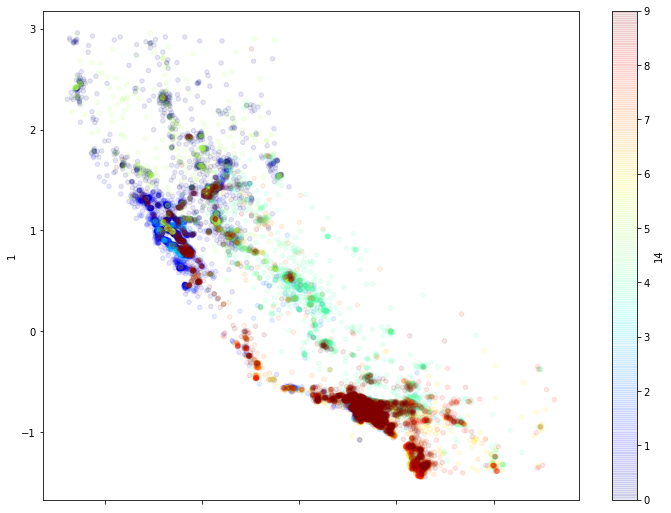

In [0]:
km = kmeans(housing_transform, k=10, p=2)
state = np.concatenate([km['clusters'][i] for i in range(len(km['clusters']))])
statepd = pd.DataFrame(state)
statepd.plot(kind="scatter", x=0, y=1, c=14, colormap='jet', figsize=(12, 9), alpha=.1)

In [0]:
km['SSE']

111367.82816805341

In [0]:
km['centroids']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,-1.184876,1.271695,0.360626,-0.301652,-0.274657,-0.347043,-0.286019,-0.403060,-0.463029,0.128651,0.465817,0.000000,0.364823,0.040709
1,-1.093935,0.768105,0.238328,0.075595,-0.058475,-0.152963,-0.031374,0.763822,1.186522,0.327782,0.105980,0.000000,0.304693,0.261544
2,0.597881,-0.675790,1.146563,-0.693771,-0.659304,-0.567906,-0.660971,-0.516490,-0.263521,0.822322,0.122514,0.001283,0.000000,0.053881
3,-0.177775,-0.051202,0.064132,0.016449,-0.447056,-0.411919,-0.430454,3.822030,2.408938,0.567961,0.060680,0.000000,0.199029,0.172330
4,0.366853,0.026665,-0.391222,-0.011432,-0.063142,-0.036680,-0.104689,-0.277201,-0.770869,0.000000,0.997523,0.000000,0.000000,0.002477
5,-1.109926,1.445192,0.367324,-0.753492,-0.727516,-0.757978,-0.776207,-1.042310,-1.072568,0.041176,0.741176,0.000000,0.165882,0.051765
6,0.984647,-1.069785,-0.341627,-0.466670,-0.460784,-0.546387,-0.485909,-0.181317,0.265054,0.038015,0.161563,0.002112,0.000000,0.798310
7,0.619109,-0.694798,-0.239148,-0.454208,-0.479248,-0.384012,-0.467550,0.167450,0.054067,0.927560,0.064713,0.000000,0.000000,0.007727
8,1.074054,-1.069131,-0.495221,0.259605,0.536844,0.229234,0.425107,-0.661555,-0.568798,0.083151,0.229759,0.000000,0.000000,0.687090
9,0.459401,-0.528673,-0.310072,0.992321,1.075717,1.158084,1.125911,0.104455,0.231562,0.795007,0.130341,0.000240,0.021123,0.053289


In [0]:
SSE_vs_k = [167623, 153519, 152963, 139975, 129392, 98782, 115323, 99771, 111367]
ks = [a for a in range(2, 11)]

[2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0.5, 1.0, 'SSE vs. K')

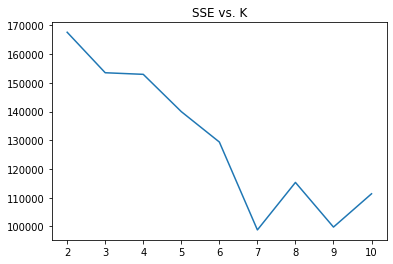

In [0]:
from matplotlib import pyplot as plt
plt.plot(ks, SSE_vs_k)
plt.title('SSE vs. K')

In [0]:
km['stdevs']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Dummy_1,Ocean_Dummy_2,Ocean_Dummy_3,Ocean_Dummy_4,Ocean_Dummy_5
0,0.361204,0.444637,0.982905,0.403693,0.476834,0.442116,0.485835,0.484598,0.540860,0.334814,0.498830,0.000000,0.481380,0.197614
1,0.580088,0.566524,1.025718,0.661134,0.668339,0.576547,0.685612,0.772528,0.835388,0.469405,0.307812,0.000000,0.460277,0.439476
2,0.298365,0.309846,0.476623,0.245063,0.280419,0.327088,0.285549,0.610936,0.767351,0.382241,0.327879,0.035794,0.000000,0.225782
3,0.994186,0.862241,1.097363,0.813049,0.547994,0.549899,0.568897,1.035071,0.404751,0.495360,0.238742,0.000000,0.399270,0.377667
4,0.747278,0.764720,0.875029,0.522595,0.511008,0.491591,0.485500,0.681906,0.516381,0.000000,0.049708,0.000000,0.000000,0.049708
5,0.486709,0.550828,0.991647,0.233338,0.282524,0.281154,0.279884,0.322863,0.255983,0.198698,0.437988,0.000000,0.371975,0.221552
6,0.540567,0.315980,0.895036,0.376381,0.391051,0.330412,0.389136,0.784219,1.057522,0.191232,0.368049,0.045907,0.000000,0.401262
7,0.497100,0.463890,0.776703,0.283566,0.291981,0.339839,0.298677,0.773880,0.710982,0.259216,0.246020,0.000000,0.000000,0.087563
8,0.511295,0.349817,0.857518,0.764665,0.861204,0.541617,0.641242,0.492396,0.471857,0.276110,0.420678,0.000000,0.000000,0.463678
9,0.693377,0.669793,0.918839,1.572852,1.479335,1.507762,1.464394,0.850657,0.858035,0.403696,0.336678,0.015491,0.143796,0.224608


# Changing The Number of Centroids
Overall, I noticed that, as K increases, SSE generally goes down, as expected. As more clusters were added, more features became significant in separating the clusters. For example, when k=2, the clusters were fairly uniform other than a few variables, and no feature means at all got got out of the range -1 to 1. However, as k grew, different clusters began to exhibit more distinct features compared to the entire sample. For k=5, for example, one cluster is significantly older and wealthier, with a median (standardized) age of about 1, a median income of .5, and a median house value of .8. Given the SSE plot, I believe that about 7 clusters is optimal, as a clear 'elbow' can be seen there.

For K=10, we actually do see Silicon Valley. There's a bright light-blue spot right where Palo Alto is, and we can see from the median values at cluster 3, that this grouping has an enormous median home value of 2.4, and median income of 3.8. The standard deviations are all around 1 or lower, with the standard deviation for household value at a very low .4, so this grouping is more homogenous compared to the entire sample. However, the standard deviations  for latitude and longitude are both close to 1, which is about the same as the sample standard deviation. The mean values for longitude and latitude occur around Palo Alto, so this grouping is likely Silicon Valley plus other wealthy households throughout California.

 Cluster 1 covers much of the rest of the Bay area, as well as areas surrounding Sacramento. This cluster has older houses than the general population, and has higher incomes and house values, but not as high as cluster 3.

Clusters 8 and 9 roughly cover Los Angeles and San Diego. These clusters both have newer homes in densely populated areas, but the houses in the cluster covering Los Angeles are generally worth more.

It's hard to make sweeping generalizations, because the clusters reveal many different groups of people with different combinations of features. For example, sometimes a cluster might appear with many wealthy people owning large new homes, but then for the next increase in k, there's a cluster with many wealthy people owning small old homes. Rerunning the algorithm also almost always changes the results drastically. 

Though the numbers were somewhat eratic I did notice a few patterns that were fairly persistent. Clusters comprised of home that are largely inland seem to have lower incomes and lower house values (see clusters 5 and 6 for k=10). It also appears that the clusters with the highest 'household' and 'population' values occur in Southern California around Los Angeles and San Diego, meaning those areas are relatively densely populated.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 





#Housing Crisis
Though the kmeans clustering revealed some interesting patterns in the housing data, it doesn't shed much led on the economic phenomena that led to the crisis. That being said, we can at least try to use what information we have to formulate some possible solutions.

Housing prices were generally higher in coastal areas, and especially high in the bay area, while they were lower inland. Property near the coastline is almost always more expensive, but this phenomena is probably also exacerbated by the high concentration of high-paying industries, such as entertainment and tech, on the Califorian coast. The Californian government could somehow incentivize high-income citizens on the coast to move inland. Or, it could provide economic incentives to increase the amount of low income housing being built on the coast. Both of these would caues home prices to drop, and make the coastal regions more affordable to live in for low income citizens.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 3:...".

Best of luck and have fun!